In [1]:
import os
import pandas as pd
os.chdir("..")

In [2]:
from recoexplainer.config import cfg
from recoexplainer.data_reader.data_reader import DataReader
from recoexplainer.models.emf_model import EMFModel

In [3]:
data = DataReader(cfg.ml100k)
data.make_consecutive_ids_in_dataset()

In [4]:
emf = EMFModel(cfg.model.emf)

In [5]:
emf.fit(data)

Range of userId is [0, 942]
Range of itemId is [0, 1681]


True

In [6]:
mf = EMFModel(cfg.model.mf)

In [7]:
mf.fit(data)

Range of userId is [0, 942]
Range of itemId is [0, 1681]


True

In [8]:
import umap

In [9]:
dim_red_mf = umap.UMAP().fit_transform(mf.item_embedding())
dim_red_mf_usr = umap.UMAP().fit_transform(mf.user_embedding())

dim_red_emf = umap.UMAP().fit_transform(emf.item_embedding())
dim_red_emf_usr = umap.UMAP().fit_transform(emf.user_embedding())

In [10]:
user_X = 260
rated_items = data.dataset[data.dataset.userId == user_X].itemId

In [11]:
item_emb_mf_for_user_X = pd.DataFrame.from_dict({
    'x': dim_red_mf[:,0],
    'y': dim_red_mf[:,1],
    'expl': mf.explainability_matrix[user_X, :]
})

item_emb_mf_for_user_X = item_emb_mf_for_user_X.sort_values(by=['expl'])

In [12]:
item_emb_emf_for_user_X = pd.DataFrame.from_dict({
    'x': dim_red_emf[:,0],
    'y': dim_red_emf[:,1],
    'expl': emf.explainability_matrix[user_X, :]
})

item_emb_emf_for_user_X = item_emb_emf_for_user_X.sort_values(by=['expl'])

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

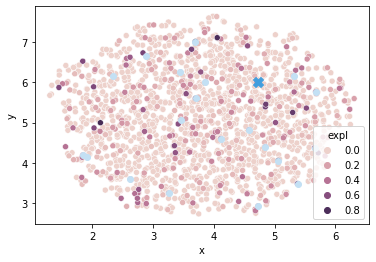

In [14]:
sns.scatterplot(data=item_emb_mf_for_user_X, x="x", y="y", hue="expl")

plt.scatter(dim_red_mf[rated_items,0], 
            dim_red_mf[rated_items,1], 
            marker='o', c='#c3e0f4')

plt.scatter(dim_red_mf_usr[user_X,0], 
            dim_red_mf_usr[user_X,1], 
            marker='X', s=100, c='#419ede')

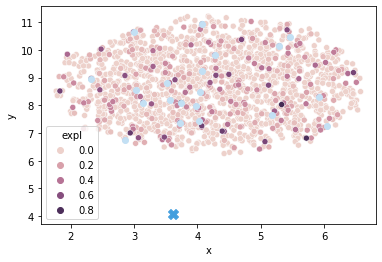

In [15]:
sns.scatterplot(data=item_emb_emf_for_user_X, x="x", y="y", hue="expl")

plt.scatter(dim_red_emf[rated_items,0], 
            dim_red_emf[rated_items,1], 
            marker='o', c='#c3e0f4')

plt.scatter(dim_red_emf_usr[user_X,0], 
            dim_red_emf_usr[user_X,1], 
            marker='X', s=100, c='#419ede')

In [16]:
cnt = data.dataset.groupby(by="userId").count().sort_values(by='rating')
cnt[cnt.rating >= 20]

,itemId,rating,timestamp
userId,,,
260,20,20,20
43,20,20,20
874,20,20,20
231,20,20,20
852,20,20,20
...,...,...,...
36,518,518,518
442,540,540,540
57,636,636,636
